In [17]:
import pandas as pd
from cleantext import clean
import matplotlib.pyplot as plt
import nltk
import functions as funs

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 150)

In [18]:
stopwordsDF = pd.read_csv('data/stopwords.csv')
stopwordsSeries = stopwordsDF.squeeze()
stopwords = set(stopwordsSeries)

In [19]:
#Reading in small news_data-set
news_data = pd.read_csv('data/data.csv')
#Saving 'content' column into variable
content_column = news_data['content']

In [20]:
content_column = content_column.apply(lambda x: funs.remove_dates_from_content(x))


content_column = content_column.apply(lambda x: funs.remove_bar_from_content(x))

#Calling the clean method with appropriate arguments and assigning the result back to 'content_column'
content_column_cleaned = content_column.apply(lambda x : clean(x,
    fix_unicode=False,             # fix various unicode errors
    to_ascii=False,                # transliterate to closest ASCII representation
    lower=True,                    # lowercase text
    no_line_breaks=True,           # fully strip line breaks as opposed to only normalizing them
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_phone_numbers=True,         # replace all phone numbers with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_digits=True,                # replace all digits with a special token
    no_currency_symbols=True,      # replace all currency symbols with a special token
    no_punct=True,                 # remove punctuations
    replace_with_punct="",         # instead of removing punctuations you may replace them
    replace_with_url="_URL_",
    replace_with_email="_EMAIL_",
    replace_with_phone_number="_PHONE_",
    replace_with_number="_NUMBER_",
    replace_with_digit="0",
    replace_with_currency_symbol="_CUR_",
    lang="en"                    
))

In [21]:
#Tokenize
content_column_tokenized = content_column_cleaned.apply(lambda x: nltk.word_tokenize(x))

In [22]:
#Compute vocabulary size with and without stopwords
vocabulary_size_with_stopwords = funs.vocabulary_size(content_column_tokenized)[0]

#Remove stopwords
content_column_no_stopwords = content_column_tokenized.apply(lambda x: funs.remove_stopwords(x, stopwords))

vocabulary_size_no_stopwords = funs.vocabulary_size(content_column_no_stopwords)[0]
print(f"vocabulary size before removal of stopwords: {vocabulary_size_with_stopwords}")
print(f"vocabulary size after removal of stopwords: {vocabulary_size_no_stopwords}")

#Compute the reduction rate of the vocabulary after removing stopwords
stopword_removal_reduction_rate = funs.reduction_rate(vocabulary_size_no_stopwords,vocabulary_size_with_stopwords)
print(f"Reduction rate of vocabulary size after removing stopwords: {stopword_removal_reduction_rate}")

vocabulary size before removal of stopwords: 16653
vocabulary size after removal of stopwords: 16167
Reduction rate of vocabulary size after removing stopwords: 0.029


In [23]:
#Stemming
content_column_stemmed = content_column_no_stopwords.apply(lambda x: funs.list_stemmer(x))

#Compute vocabulary size of stemmed corpus
vocabulary_size_stemmed = funs.vocabulary_size(content_column_stemmed)[0]

print(f"Vocabulary size before stemming: {vocabulary_size_no_stopwords}")
print(f"Vocabulary size after stemming: {vocabulary_size_stemmed}")


stemming_reduction_rate = funs.reduction_rate(vocabulary_size_stemmed,vocabulary_size_no_stopwords)

print(f"Reduction rate of vocabulary size after stemming: {stemming_reduction_rate}")

Vocabulary size before stemming: 16167
Vocabulary size after stemming: 10803
Reduction rate of vocabulary size after stemming: 0.332


most frequent with stopwords ['the', 'of', 'to', 'and', 'a', 'in', 'is', 'that', 'number', 'for', 'it', 'are', 'on', 'with', 'this', 'you', 'as', 'be', 'i', 'by', 'have', 'not', 'was', 'from', 'at', 'or', 'we', 'they', 'its', 'but', 'your', 'has', 'an', 'their', 'can', 'all', 'will', 'more', 'about', 'if', 'us', 'one', 'what', 'who', 'he', 'were', 'which', 'so', 'there']
most frequent without stopwords ['a', 'number', 'people', 'trump', 'time', 'blockchain', 'url', 'market', 'government', 'state', 'president', 'life', 'make', 'world', 'things', 'years', 'bitcoin', 'states', 'stocks', 'fact', 'headline', 'year', 'good', 'exceed', 'searches', 'war', 'dont', 'power', 'back', 'obama', 'american', 'money', 'part', 'free', 'day', 'source', 'news', 'made', 'global', 'work', 'report', 'russia', 'long', 'public', 'research', 'numbernumber', 'policy', 'point', 'law']
most frequent without stopwords ['a', 'number', 'time', 'peopl', 'state', 'trump', 'market', 'year', 'blockchain', 'make', 'url', 

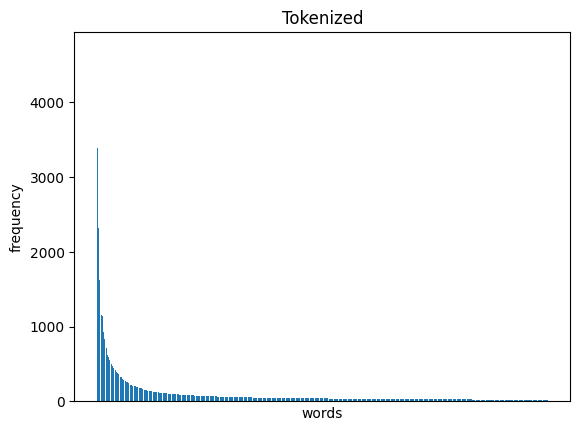

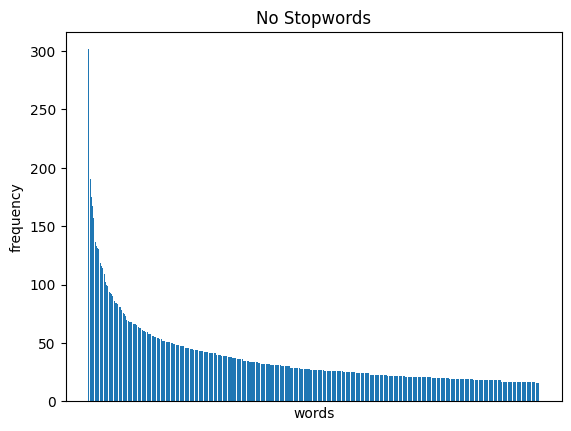

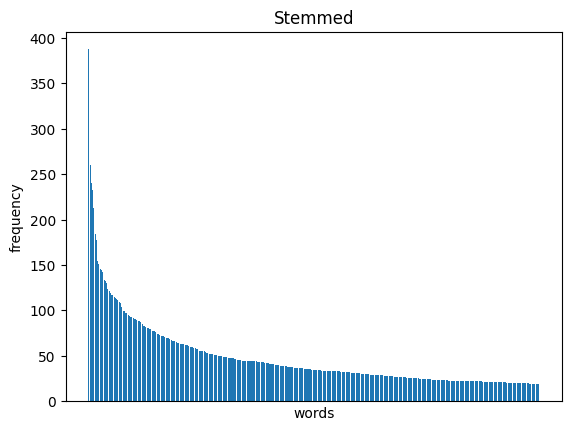

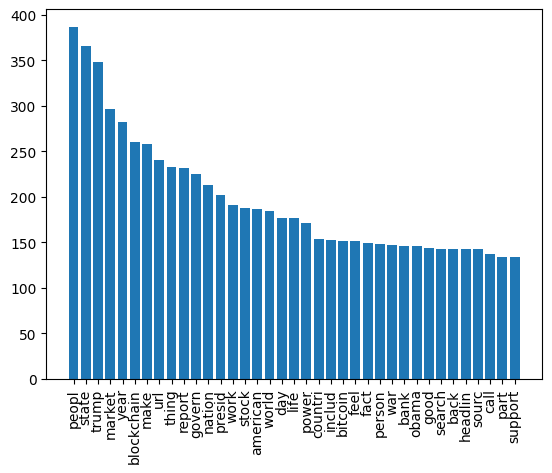

In [24]:
#exploration of vocabulary

#finding the most frequent words and plotting frequency distribution after tokenization, 
#removal of stopwords and stemming
most_frequent_tokenized = funs.most_frequent(content_column_tokenized, 0, 49)
print("most frequent with stopwords", list(most_frequent_tokenized.keys()))

most_frequent_no_stopwords = funs.most_frequent(content_column_no_stopwords, 0, 49)
print("most frequent without stopwords", list(most_frequent_no_stopwords.keys()))

most_frequent_stemmed = funs.most_frequent(content_column_stemmed, 0, 49)
print("most frequent without stopwords", list(most_frequent_stemmed.keys()))

def word_frequency_plot(series, title):
    '''function for plotting from the third most frequent word to the 1000 most frequent word
    as well as their corresponding frequencies in a barplot.'''
    plt.bar(*zip(*funs.most_frequent(series, 3, 1000).items()))
    plt.title(title)
    plt.xlabel('words')
    plt.ylabel('frequency')
    plt.xticks([])
    plt.show()

word_frequency_plot(content_column_tokenized, 'Tokenized')
word_frequency_plot(content_column_no_stopwords, 'No Stopwords')
word_frequency_plot(content_column_stemmed, 'Stemmed')

frequent_stemwords = funs.most_frequent(content_column_stemmed, 3, 40)

plt.bar(*zip(*frequent_stemwords.items()))
plt.xticks(rotation=90)
plt.show()

In [25]:
#træk informations-kategori og content ud i én dataframe
article_type = news_data['type']
news_data['type'] = news_data['type'].astype('category')

fakenews = set(['unreliable', 'fake', 'conspiracy'])

#laver en ny kolonne med lidt simplere kategorier
news_data['simple_type'] = news_data['type'].apply(lambda x: funs.label_news(x, fakenews)).astype('category') 

print(news_data['type'].value_counts())
print(news_data['simple_type'].value_counts())


type
fake          155
conspiracy     31
political      23
bias            6
junksci         6
unknown         6
unreliable      6
reliable        3
clickbait       1
hate            1
Name: count, dtype: int64
simple_type
fake        192
unknown      43
reliable      3
Name: count, dtype: int64


Index(['Unnamed: 0', 'id', 'domain', 'type', 'url', 'content', 'scraped_at',
       'inserted_at', 'updated_at', 'title', 'authors', 'keywords',
       'meta_keywords', 'meta_description', 'tags', 'summary', 'simple_type'],
      dtype='object')
Scraped_at count                            250
unique                             2
top       2018-01-25 16:17:44.789555
freq                             197
Name: scraped_at, dtype: object
domains:
 count                   250
unique                   29
top       beforeitsnews.com
freq                    155
Name: domain, dtype: object


<Axes: xlabel='domain'>

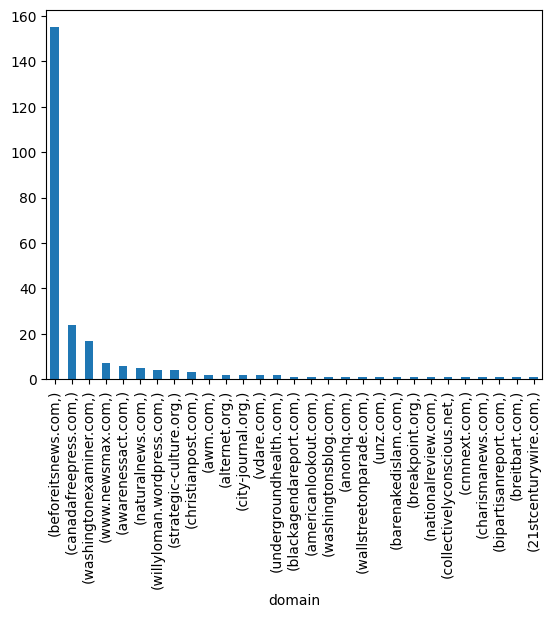

In [26]:
#More  exploration
print(news_data.columns)

print("Scraped_at", news_data['scraped_at'].describe())
#dvs de er alle sammen indsamlet i 2018
#obs: det virker ikke muligt at finde ud af præcis hvornår hver enkelt artikel er fra? Det virker vigtigt

print("domains:\n", news_data['domain'].describe())
news_data['domain'].to_frame().value_counts().plot(kind='bar')
#obs: 155 af data kommer fra den samme, og generelt ikke særligt velfordelte kilder


authors:
 count            170
unique           109
top       John Rolls
freq              10
Name: authors, dtype: object


<Axes: xlabel='authors'>

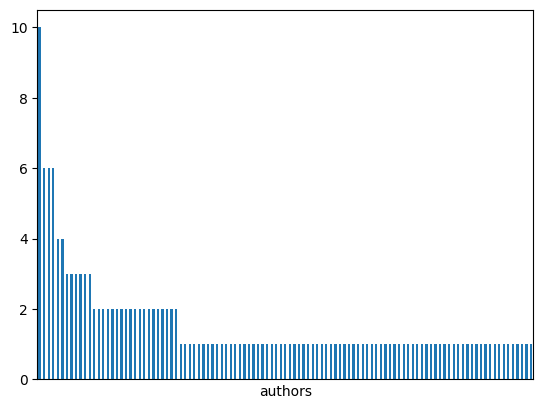

In [31]:
print("authors:\n", news_data['authors'].describe())
news_data['authors'].to_frame().value_counts().plot(kind='bar', xticks=[])

statistics on word length (content with stopwords)


C:\Users\emilo\AppData\Local\Temp\ipykernel_18380\1430300808.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  news_data.groupby('type')['mean_word_length'].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
bias,6.0,4.899252,0.175148,4.616368,4.804246,4.965059,5.018897,5.061538
clickbait,1.0,4.749141,NaN,4.749141,4.749141,4.749141,4.749141,4.749141
conspiracy,31.0,4.983314,0.431482,4.312102,4.619814,4.890863,5.279984,6.039474
fake,155.0,4.927044,0.455462,3.984797,4.610111,4.961598,5.202425,6.149254
hate,1.0,4.767857,NaN,4.767857,4.767857,4.767857,4.767857,4.767857
junksci,6.0,5.518094,0.389807,5.193980,5.233175,5.333283,5.859740,6.012987
political,23.0,5.017145,0.309765,4.484527,4.756736,5.080420,5.222251,5.509434
reliable,3.0,4.831556,0.430026,4.338942,4.681376,5.023810,5.077862,5.131915
unknown,6.0,4.978990,0.401662,4.411844,4.678182,5.115048,5.304931,5.331217


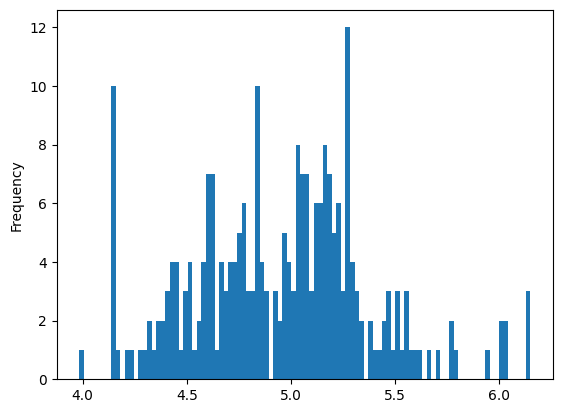

In [28]:
#Længde på ord, middelværdi og spredning
#vocabulary size/antal ord, middelværdi og spredning

tryplot = content_column_tokenized.apply(lambda x: funs.mean_length_of_words(x))
tryplot.plot(kind="hist",bins=100)
tryplot.describe()
news_data['mean_word_length']=tryplot
print("statistics on word length (content with stopwords)")
news_data.groupby('type')['mean_word_length'].describe()


In [29]:
news_data['unique_words_ratio']=content_column_no_stopwords.apply(lambda x: funs.unique_words_ratio(x))
news_data.groupby('type')['unique_words_ratio'].describe()

C:\Users\emilo\AppData\Local\Temp\ipykernel_18380\1922112113.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  news_data.groupby('type')['unique_words_ratio'].describe()


,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
bias,6.0,0.717553,0.086175,0.597855,0.652701,0.754286,0.774652,0.798611
clickbait,1.0,0.671233,NaN,0.671233,0.671233,0.671233,0.671233,0.671233
conspiracy,31.0,0.721848,0.083861,0.576577,0.662572,0.706383,0.750000,0.941176
fake,155.0,0.706153,0.136763,0.325095,0.623656,0.693820,0.803425,1.000000
hate,1.0,0.956522,NaN,0.956522,0.956522,0.956522,0.956522,0.956522
junksci,6.0,0.721669,0.137005,0.639769,0.669903,0.672030,0.675751,1.000000
political,23.0,0.716906,0.116851,0.508058,0.621247,0.740000,0.817720,0.900000
reliable,3.0,0.711972,0.076883,0.657993,0.667957,0.677922,0.738961,0.800000
unknown,6.0,0.593096,0.100929,0.430859,0.541534,0.628219,0.644633,0.708535


In [30]:
news_data['content_no_stopwords']=content_column_no_stopwords
news_data['content_stemmed']=content_column_stemmed

#how many articles out of all articles mentions the topic?
print('"trump" mention, fake:', funs.mention_ratio(news_data, "trump","fake"))
print('"trump" mention, reliable:', funs.mention_ratio(news_data, "trump","reliable"))
print('"research" mention, fake:', funs.mention_ratio(news_data, "research","fake"))
print('"research" mention, reliable:', funs.mention_ratio(news_data, "research","reliable"))

"trump" mention, fake: 0.8516129032258064
"trump" mention, reliable: 0.0
"research" mention, fake: 0.16129032258064516
"research" mention, reliable: 0.3333333333333333
